The following model is an adaptation of the Axelrod 1997 model of cultural diffusion to incorprote an agent architecture that relies on word embeddings for likelihood and social comparison.



# Overview, Design, Details + Decisions

## Overview
The purpose of the study is to test word embeddings as a new technology for building agents for natural language. The model is designed for other agent-based modelers to illustrate word embeddings potential for building agents. The model consists of human agents dispersed on a 10 x 10 grid. Agents are fixed in one location in two arrays and explicitly have a location, they have a bag of words, and an embeddings file pointer. The model treats everything other than cultural influence as exogeneous and is a highly stylized model for illustration purposes.

A target agents are selected at random; a neighbor of this target is selected at random. The target agent perceives and evaluates the neighbor agent. Then, with a probability proportional to the similarity between their word embeddings, the target agent decides whether or not to interact. If they interact, the target agent selects an unknown word at random in the neighbor agent to add to its bag of words.

## Design
The model is theoretically motivated by Axelrod's (1997) theory of cultural diffusion and similarity comparison. The link to complexity is that individual characteristics recombine in nonlinear ways to cause cultural change in the population which is path-dependent and hetergeneous over space. The agent decision models are based on the assumption that 'birds of the feather flock together', which is assumed in Axelrod 1997. Here, we extend this logic to language - meaning that agents evaluate one anothers' similarity throug language.

Agents do not pursue an explicit objective in the model. Agents decisions are made probabilistically based on consine similarity comparison. Agent behavior remains static throughout the model other than the learning of new words, which will alter the decision-making process through similarity comparison. Decision-making is influenced spatially because agents can only interact with their neighbors in their immediate neighborhood (queen continguity). Time does not alter decision-making. Uncertainty in how the environment is perceived is not represented. Individuals learn if they decide to interact with another agent, then they at random copy a new word. There is no collective learning. Agents only sense their neighbors and they do so perfectly. There is no prediction of the future. 

Interactions between agents depend on the agents neighborhood and communication. Agents communicate by providing their entire bag of words to one another. There are no collectives explicitly determined though collective cultural patterns emerge throughout modeling.

Agents are highly hetergeneous; each agents' bag of word differs by the words in it. Because the bag of words drive decision-making, each agent decides differently using the same mechanics.

Throughout the model two variables are collected by each agent.
1. Agents collect their similarity to their neighborhood by calcualting cosine similarity.
2. Agents collect their global similarity by calculating their similarity to all other agents in the model.

All ordering processes are random. Decision-making and learning are random. 

## Details
All models were built using Python 3.5 in Jupyter 1.0.0 with Numpy 1.14.0. Visualizations were created using Maplotlib 2.1.0. All code and data – except for the word embeddings files – can be found in the Supplemental Materials. The model is accessible on github and in the supplemental materials of the paper.

Agent initialization: words from a text are selected at random for each agent up to the predefined culture size set by the modeler. In this set of similations, three sizes were used: 5, 10, 15. These were selected to match the choices made by Axelrod 1997.

Word embeddings and text are input into the model. The GLoVE 6B set were used in this case, but any of the other GloVE embeddings could be used.

The model does not have any submodels. 

# Get Environment Set Up

In [102]:
%run ../models/agent-architecture.py

In [2]:
glove_6b_300 = word_embeddings('../../word_embeddings/glove.6B.300d.txt')
glove_6b_300.load_embeddings()

Loading Embeddings: ../../word_embeddings/glove.6B.300d.txt
Go grab a beverage. This may take some time...
-----------------------------------------------
At word  10000  :  quinn
At word  20000  :  pitting
At word  30000  :  monfils
At word  40000  :  midwife
At word  50000  :  nanda
At word  60000  :  eales
At word  70000  :  1,260
At word  80000  :  20,500
At word  90000  :  wrx
At word  100000  :  autocephalous
At word  110000  :  rejectionist
At word  120000  :  grilli
At word  130000  :  savarkar
At word  140000  :  v-league
At word  150000  :  al-quds
At word  160000  :  1,494
At word  170000  :  hilfe
At word  180000  :  champagnat
At word  190000  :  12.1-inch
At word  200000  :  soroca
At word  210000  :  movado
At word  220000  :  abassan
At word  230000  :  hazuki
At word  240000  :  dandurand
At word  250000  :  bottas
At word  260000  :  ritschl
At word  270000  :  schismatics
At word  280000  :  aarseth
At word  290000  :  golonka
At word  300000  :  katoucha
At word  31

# Model Run: 5 Cultural Features, e.g. starting bag of words = 5

In [114]:
%run ../models/axelrod-model.py
model = axelrod_model(agent_class=agent_axelrod_model, 
                      culture_size=5,  # below 4, model will error due to some agents receiving stop words only, 
                      # stopwords are cleaned out as part of the agent routine
                      world_size_rows=10, 
                      world_size_columns=10, 
                      simulation_duration=51, 
                      random_number_seed=6)
text = "Agriculture is the cultivation and breeding of animals and plants to provide food, fiber, medicinal plants and other products to sustain and enhance life.[1] Agriculture was the key development in the rise of sedentary human civilization, whereby farming of domesticated species created food surpluses that enabled people to live in cities. The study of agriculture is known as agricultural science. The history of agriculture dates back thousands of years; people gathered wild grains at least 105,000 years ago, and began to plant them around 11,500 years ago, before they became domesticated. Pigs, sheep, and cattle were domesticated over 10,000 years ago. Crops originate from at least 11 regions of the world. Industrial agriculture based on large-scale monoculture has in the past century become the dominant agricultural method. Modern agronomy, plant breeding, agrochemicals such as pesticides and fertilizers, and technological developments have sharply increased yields from cultivation, but at the same time have caused widespread ecological damage. Selective breeding and modern practices in animal husbandry have similarly increased the output of meat, but have raised concerns about animal welfare and environmental damage through contributions to global warming, depletion of aquifers, deforestation, antibiotic resistance, and growth hormones in industrially produced meat. Genetically modified organisms are widely used, although they are banned in several countries. The major agricultural products can be broadly grouped into foods, fibers, fuels, and raw materials. Classes of foods include cereals (grains), vegetables, fruits, oils, and meat. Over one third of the world's workers are employed in agriculture, second only to the service sector, although the number of agricultural workers in developed countries has decreased significantly over the past several centuries. A corporation is a company or group of people authorized to act as a single entity (legally a person) and recognized as such in law. Early incorporated entities were established by charter (i.e. by an ad hoc act granted by a monarch or passed by a parliament or legislature). Most jurisdictions now allow the creation of new corporations through registration. Corporations enjoy limited liability for their investors, which can lead to losses being externalized from investors to the government or general public. Corporations come in many different types but are usually divided by the law of the jurisdiction where they are chartered into two kinds: by whether they can issue stock or not, or by whether they are formed to make a profit or not."
model.initialize(glove_6b_300, text)

In [115]:
# proportion of concepts in each agent
len(model.model_world[0][0].bag_of_words)/len(text)

0.013247539742619227

Iteration:  0


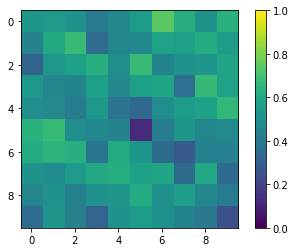

No new words
Iteration:  5


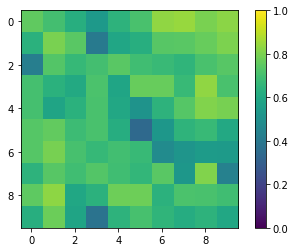

Iteration:  10


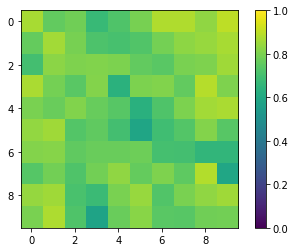

Iteration:  15


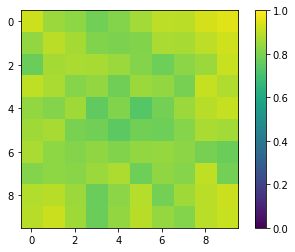

Iteration:  20


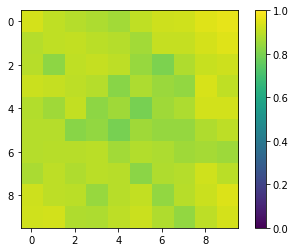

Iteration:  25


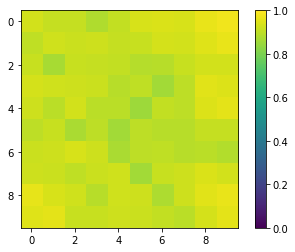

Iteration:  30


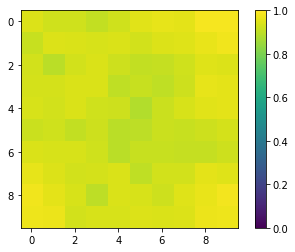

No new words
Iteration:  35


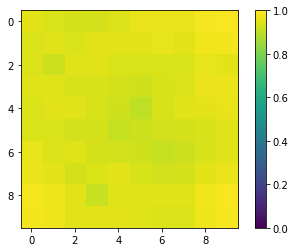

No new words
Iteration:  40


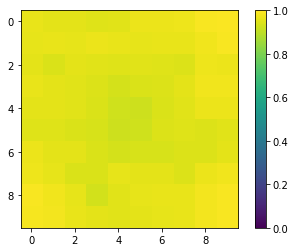

No new words
No new words
Iteration:  45


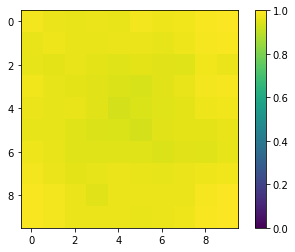

No new words
No new words
No new words
Iteration:  50


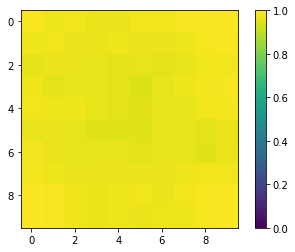

In [116]:
model.run()

In [143]:
y1, x1 = 5,5
print(model.model_world[y1][x1].average_similarity)
print(model.model_world[y1][x1].local_similarity)
print(model.model_world[y1][x1].bag_of_words)

0.9311323101325093
0.9496701989957909
monarch husbandry 105,000 (grains), cereals as and development are thousands divided although deforestation, such is an species modified depletion human began caused (legally ecological now general environmental fibers, liability from years plants dates in hormones least The agrochemicals by kinds: corporations registration. produced lead stock but


In [145]:
y1, x1 = 5,4
print(model.model_world[y1][x1].average_similarity)
print(model.model_world[y1][x1].local_similarity)
print(model.model_world[y1][x1].bag_of_words)

0.9375021274897379
0.950715295142704
although registration. around to at such depletion caused foods (grains), liability fibers, The 105,000 formed lead an and legislature). deforestation, general species dates not, by least or years husbandry cultivation in ecological of produced as 11 stock hormones Most divided study similarly vegetables, (legally now


In [144]:
print(model.model_world[0][0].average_similarity)
print(model.model_world[0][0].local_similarity)
print(model.model_world[0][0].bag_of_words)

0.8858130569717055
0.9886654134651857
foods in number least registration. at to such Pigs, fruits, by breeding and provide raw kinds: organisms Selective hormones food agrochemicals breeding, A caused plants developed other grains Over are investors originate created 11 can come cereals limited large-scale damage. a sector, global depletion century Most parliament the of meat.


In [16]:
from matplotlib import pyplot as plt
%matplotlib inline

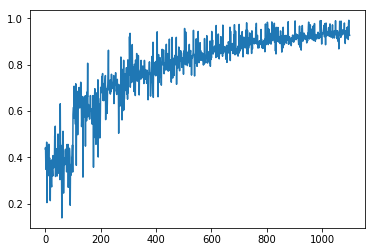

In [119]:
plt.plot(model.model_similarity)

# Cultural Features = 10; e.g. starting bag of words = 10

In [122]:
%run ../models/axelrod-model.py
model_10 = axelrod_model(agent_class=agent_axelrod_model, 
                      culture_size=10, 
                      world_size_rows=10, 
                      world_size_columns=10, 
                      simulation_duration=51, 
                      random_number_seed=6)
text = "Agriculture is the cultivation and breeding of animals and plants to provide food, fiber, medicinal plants and other products to sustain and enhance life.[1] Agriculture was the key development in the rise of sedentary human civilization, whereby farming of domesticated species created food surpluses that enabled people to live in cities. The study of agriculture is known as agricultural science. The history of agriculture dates back thousands of years; people gathered wild grains at least 105,000 years ago, and began to plant them around 11,500 years ago, before they became domesticated. Pigs, sheep, and cattle were domesticated over 10,000 years ago. Crops originate from at least 11 regions of the world. Industrial agriculture based on large-scale monoculture has in the past century become the dominant agricultural method. Modern agronomy, plant breeding, agrochemicals such as pesticides and fertilizers, and technological developments have sharply increased yields from cultivation, but at the same time have caused widespread ecological damage. Selective breeding and modern practices in animal husbandry have similarly increased the output of meat, but have raised concerns about animal welfare and environmental damage through contributions to global warming, depletion of aquifers, deforestation, antibiotic resistance, and growth hormones in industrially produced meat. Genetically modified organisms are widely used, although they are banned in several countries. The major agricultural products can be broadly grouped into foods, fibers, fuels, and raw materials. Classes of foods include cereals (grains), vegetables, fruits, oils, and meat. Over one third of the world's workers are employed in agriculture, second only to the service sector, although the number of agricultural workers in developed countries has decreased significantly over the past several centuries. A corporation is a company or group of people authorized to act as a single entity (legally a person) and recognized as such in law. Early incorporated entities were established by charter (i.e. by an ad hoc act granted by a monarch or passed by a parliament or legislature). Most jurisdictions now allow the creation of new corporations through registration. Corporations enjoy limited liability for their investors, which can lead to losses being externalized from investors to the government or general public. Corporations come in many different types but are usually divided by the law of the jurisdiction where they are chartered into two kinds: by whether they can issue stock or not, or by whether they are formed to make a profit or not."
model_10.initialize(glove_6b_300, text)

In [123]:
# proportion of concepts in each agent
len(model_10.model_world[0][0].bag_of_words)/len(text)

0.029901589704769114

Iteration:  0


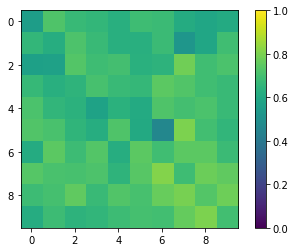

Iteration:  5


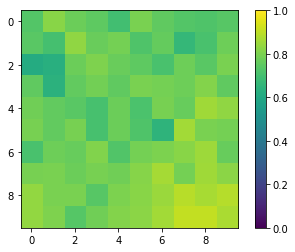

Iteration:  10


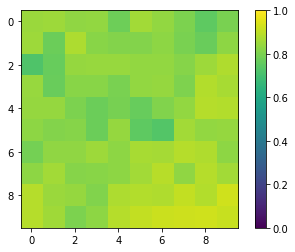

Iteration:  15


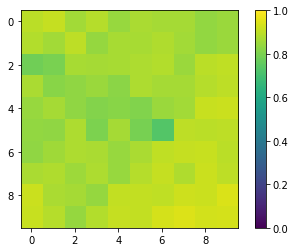

Iteration:  20


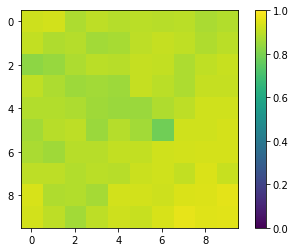

Iteration:  25


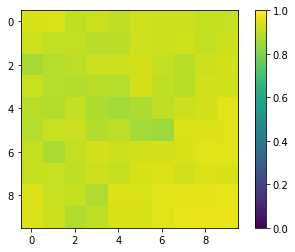

Iteration:  30


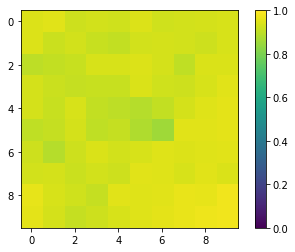

Iteration:  35


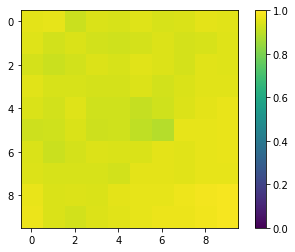

Iteration:  40


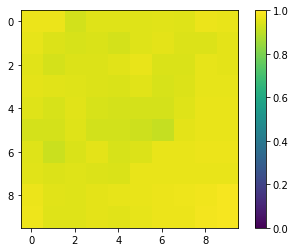

Iteration:  45


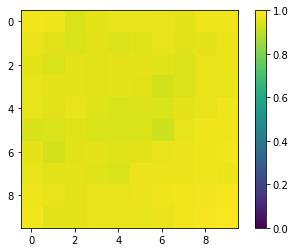

Iteration:  50


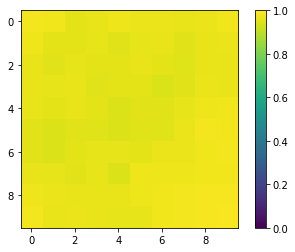

In [124]:
model_10.run()

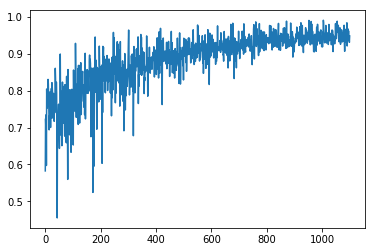

In [126]:
plt.plot(model_10.model_similarity)

# Cultural Features = 15; e.g. starting bag of words = 15

In [127]:
%run ../models/axelrod-model.py
model_15 = axelrod_model(agent_class=agent_axelrod_model, 
                      culture_size=15, 
                      world_size_rows=10, 
                      world_size_columns=10, 
                      simulation_duration=51, 
                      random_number_seed=6)
text = "Agriculture is the cultivation and breeding of animals and plants to provide food, fiber, medicinal plants and other products to sustain and enhance life.[1] Agriculture was the key development in the rise of sedentary human civilization, whereby farming of domesticated species created food surpluses that enabled people to live in cities. The study of agriculture is known as agricultural science. The history of agriculture dates back thousands of years; people gathered wild grains at least 105,000 years ago, and began to plant them around 11,500 years ago, before they became domesticated. Pigs, sheep, and cattle were domesticated over 10,000 years ago. Crops originate from at least 11 regions of the world. Industrial agriculture based on large-scale monoculture has in the past century become the dominant agricultural method. Modern agronomy, plant breeding, agrochemicals such as pesticides and fertilizers, and technological developments have sharply increased yields from cultivation, but at the same time have caused widespread ecological damage. Selective breeding and modern practices in animal husbandry have similarly increased the output of meat, but have raised concerns about animal welfare and environmental damage through contributions to global warming, depletion of aquifers, deforestation, antibiotic resistance, and growth hormones in industrially produced meat. Genetically modified organisms are widely used, although they are banned in several countries. The major agricultural products can be broadly grouped into foods, fibers, fuels, and raw materials. Classes of foods include cereals (grains), vegetables, fruits, oils, and meat. Over one third of the world's workers are employed in agriculture, second only to the service sector, although the number of agricultural workers in developed countries has decreased significantly over the past several centuries. A corporation is a company or group of people authorized to act as a single entity (legally a person) and recognized as such in law. Early incorporated entities were established by charter (i.e. by an ad hoc act granted by a monarch or passed by a parliament or legislature). Most jurisdictions now allow the creation of new corporations through registration. Corporations enjoy limited liability for their investors, which can lead to losses being externalized from investors to the government or general public. Corporations come in many different types but are usually divided by the law of the jurisdiction where they are chartered into two kinds: by whether they can issue stock or not, or by whether they are formed to make a profit or not."
model_15.initialize(glove_6b_300, text)

In [128]:
# proportion of concepts in each agent
len(model_15.model_world[0][0].bag_of_words)/len(text)

0.03520060560181681

Iteration:  0


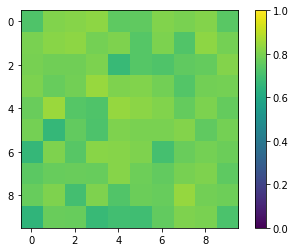

Iteration:  5


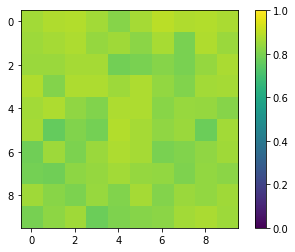

Iteration:  10


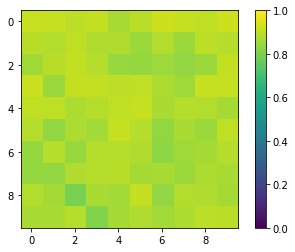

Iteration:  15


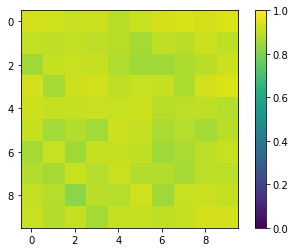

Iteration:  20


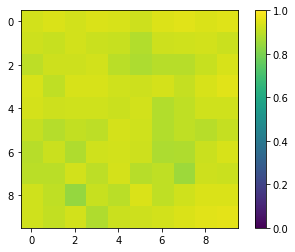

Iteration:  25


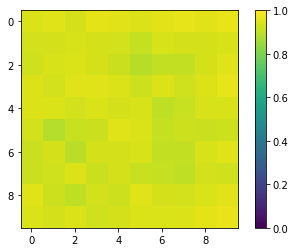

Iteration:  30


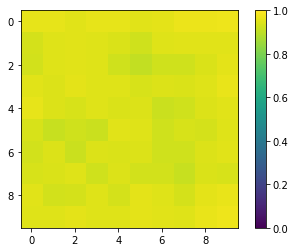

Iteration:  35


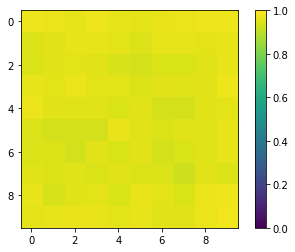

Iteration:  40


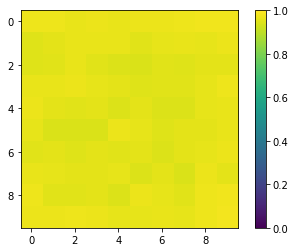

Iteration:  45


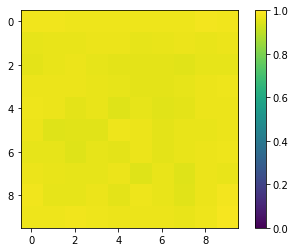

Iteration:  50


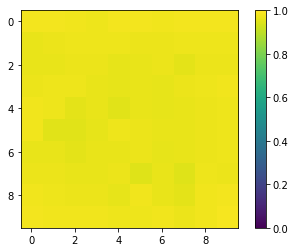

In [129]:
model_15.run()

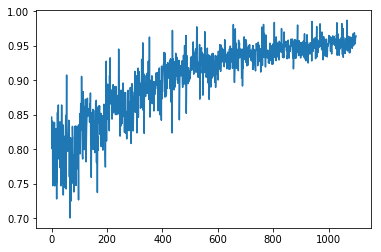

In [130]:
plt.plot(model_15.model_similarity)

# Global Similarity between 5,10,15 starting culture size

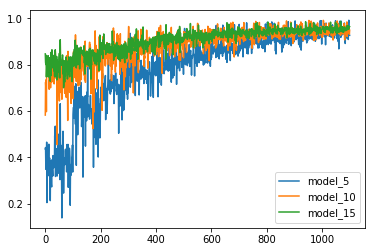

In [142]:
models = [(model, 'model_5'), (model_10, 'model_10'), (model_15, 'model_15')]

for m in models:
    plt.plot(m[0].model_similarity, label=str(m[1]))
plt.legend()
plt.show()